In [16]:
from fastai.vision.all import *
from fastai.vision.models import vgg16_bn
import glob

In [17]:
torch.cuda.is_available()

True

In [30]:
path_data = 'study-two-data'
len(glob.glob1(path_data+'/monkeypox',"*.jpg")), len(glob.glob1(path_data+'/others',"*.jpg"))

(43, 126)

In [19]:
#    
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=40),
    get_y=parent_label,
    item_tfms=[Resize(128, method='squish')], 
    batch_tfms=aug_transforms(mult=1, max_rotate = 45, max_zoom=1.02)
)

dls = data.dataloaders(path_data, batch_size=16)

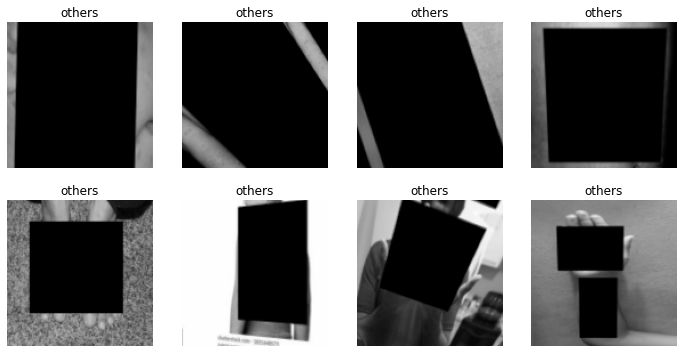

In [29]:
dls.train.show_batch(max_n=8, nrows=2)

/mnt/irisgpfs/users/cvega/jupyter_env/lib/python3.8/site-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/mnt/irisgpfs/users/cvega/jupyter_env/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/mnt/irisgpfs/users/cvega/jupyter_env/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.273015,0.699056,0.454545,00:02


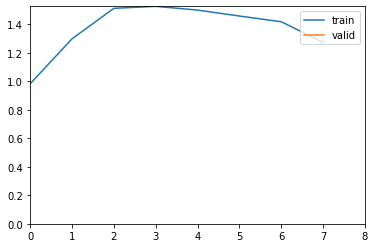

epoch,train_loss,valid_loss,error_rate,time
0,1.069510,0.792415,0.575758,00:02
1,1.010890,0.974605,0.606061,00:03
2,0.934006,1.028025,0.545455,00:02
3,0.874395,1.008275,0.484848,00:02
4,0.800512,1.071540,0.484848,00:02
5,0.790023,1.215229,0.484848,00:02
6,0.730818,1.352527,0.484848,00:03
7,0.729302,1.340288,0.454545,00:03
8,0.697157,1.369186,0.424242,00:02
9,0.653861,1.350466,0.333333,00:02


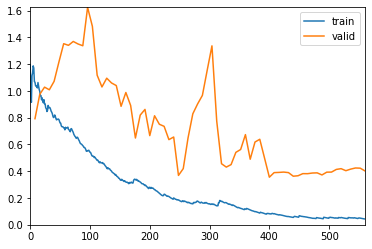

In [26]:
model = cnn_learner(dls, vgg16_bn, metrics=error_rate, lr=0.001)
model.fine_tune(70, cbs=[ShowGraphCallback()])

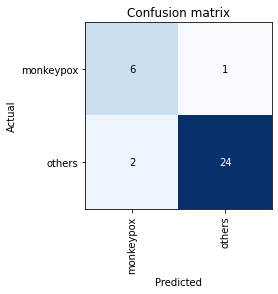

In [27]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

In [28]:
interp.print_classification_report()

              precision    recall  f1-score   support

   monkeypox       0.75      0.86      0.80         7
      others       0.96      0.92      0.94        26

    accuracy                           0.91        33
   macro avg       0.85      0.89      0.87        33
weighted avg       0.92      0.91      0.91        33

